# Machine Learning, Assignment - 3 
## <div class="alert alert-info"><b>Predicting whether brushtail possum is from Victoria Using Logistic Regression</b></div>

<div class="alert alert-info"> The common brushtail possum of the Australia region is different from the American opossum. We consider 209 brushtail possums from two regions in Australia. The first region is Victoria and the second region consists of New South Wales and Queensland.
The outcome variable, called population, takes value 1 when a possum is from Victoria and 0 when it is from New South Wales or Queensland. We consider five predictors: sex male (male is set to 1), head length, skull width, total length. 
 </div>

<div class="alert alert-info"> 1. Import the dataset from Import the dataset from https://github.com/droglenc/NCData/blob/master/Possum2.csv  (0.5 points). </div>

In [2]:
import numpy as np
import pandas as pd

possum = pd.read_csv('C:\Seetha\data\possum.csv')
possum.head()

,site,population,sex,totlen,headlen,skullwid,earconch,eyedist,age
0,1,1,0,90.5,93.1,54.8,53.6,14.2,1
1,1,1,0,89.5,94.7,67.7,53.2,14.7,1
2,1,1,0,90.5,30.0,32.0,35.5,73.2,1
3,1,1,0,89.5,29.0,31.0,36.5,73.2,1
4,1,1,0,85.5,91.5,56.3,53.2,15.1,2


<div class="alert alert-info"> 2. Extract X as all columns except the last column and Y as last column. (0.5 points) </div>

In [3]:
X = possum.iloc[:, 2:6].values # columns names can be given.
Y = possum.iloc[:, 1].values # column name can be given.
print(X.shape)
print(Y.shape)

(208, 4)
(208,)


<div class="alert alert-info"> 2A. Scale the features. (optional) This increases the accuracy. </div>

In [4]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()

# apply scaler to X using fit_transform()
Xscaled = scaler.fit_transform(X)

# display the values
print('Shape of X after StandardScaler is ', Xscaled.shape)
# print('First 5 rows of X after StandardScaler')
# print(Xscaled[:5,:])

Shape of X after StandardScaler is  (208, 4)


<div class="alert alert-info">3. Visualize the dataset. (2 points) </div>

In [5]:
feature_names = possum.columns.tolist()[2:6]
print(feature_names)

['sex ', 'totlen ', 'headlen ', 'skullwid ']


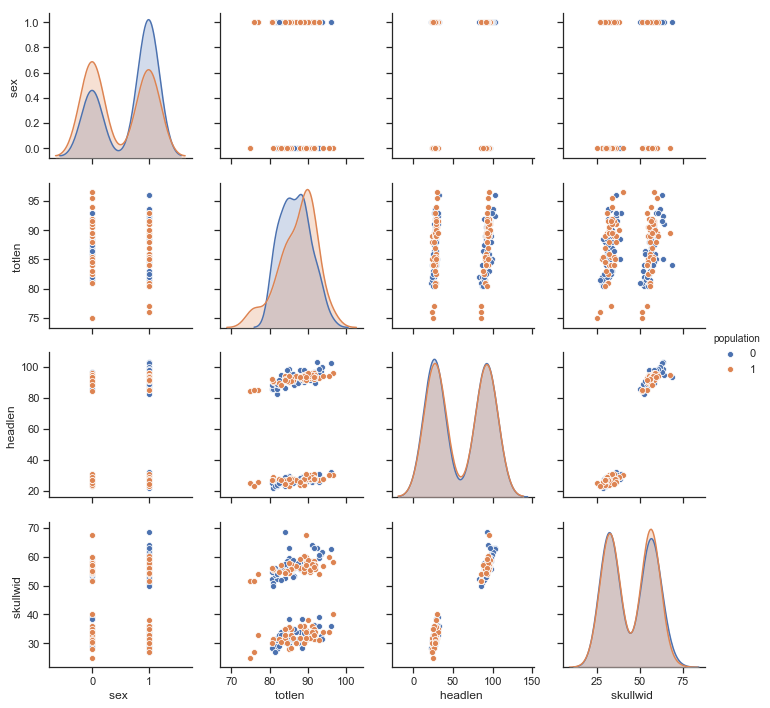

In [7]:
# pair plot to be plotted (minimum requirement)

# Basic correlogram
import seaborn as sns; 

sns.set(style="ticks", color_codes=True)
g = sns.pairplot(possum, vars=feature_names, hue='population')


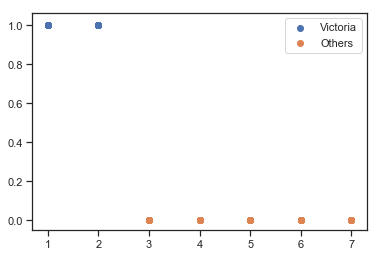

In [8]:
# plot of y alone
import matplotlib.pyplot as plt
%matplotlib inline

Victoria = possum.loc[Y == 1]
other = possum.loc[Y == 0]
plt.scatter(Victoria.iloc[:, 0], Victoria.iloc[:, 1], label='Victoria')
plt.scatter(other.iloc[:, 0], other.iloc[:, 1], label='Others')
plt.legend()
plt.show()

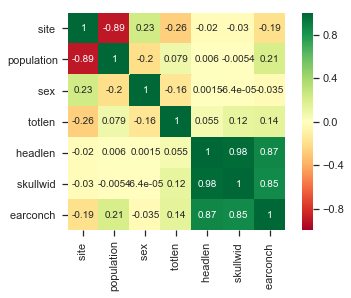

In [9]:
# correlation matrix (optional)

ax = sns.heatmap( possum.corr(),  vmin=-1, vmax=1, center=0,
    cmap='RdYlGn', annot=True, square=True )

# ax.set_xticklabels( ax.get_xticklabels(), rotation=45, horizontalalignment='right')


<div class="alert alert-info">4. Split the data into training set and testing set. (1 points) Perform 10-fold cross validation. (optional) </div>

In [10]:
from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test = train_test_split(Xscaled, Y, test_size=1/3, stratify=Y)

<div class="alert alert-info">5. Train a Logistic regression model for the dataset. (2 points) </div>

In [11]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(solver='liblinear') # default classfier

logistic_model.fit(X_train,Y_train)

y_prob  = logistic_model.predict(X_test)

<div class="alert alert-info">6. Display the coefficients and form the logistic regression equation. (1 point) </div>

<div class="alert alert-info"> 6A. Print the coefficients </div>

In [12]:
print('Inercept: ', logistic_model.intercept_)

print('Coeffients: ', logistic_model.coef_)


Inercept:  [-0.16245147]
Coeffients:  [[-0.8761949   0.97928145 -0.08970234 -0.21524796]]


<div class="alert alert-info"> 6B. Logistic regression equation </div>

In [13]:
#Display the coefficients and form the logistic regression equation

coef_dict = {}
equation = 'z = '
equation = equation + str(logistic_model.intercept_) + ' ' 
for coef, feat in zip(logistic_model.coef_[0], feature_names):
    coef_dict[feat] = coef
    equation = equation + ' + ('+ str(coef.round(2)) +'*'+ str(feat) +')'
    
print('y = 1 / (1+e^(-z))')
print('where ')
print( equation)

y = 1 / (1+e^(-z))
where 
z = [-0.16245147]  + (-0.88*sex ) + (0.98*totlen ) + (-0.09*headlen ) + (-0.22*skullwid )


<div class="alert alert-info">7. Compute the accuracy and confusion matrix. (2 points) </div>

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix 

acc = accuracy_score(Y_test, y_prob)
print('Accuracy: ', acc * 100)

conf_matrix = confusion_matrix(Y_test, y_prob) 
print('Confusion Matrix :', )
print(conf_matrix)


Accuracy:  52.85714285714286
Confusion Matrix :
[[26 13]
 [20 11]]


<div class="alert alert-info">8. Plot the decision boundary. (1 point) </div>

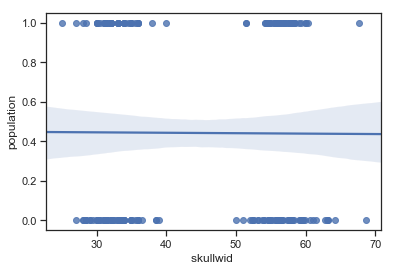

In [15]:
# option 1
sns.regplot(x='skullwid ', y='population', data=possum, logistic=True)

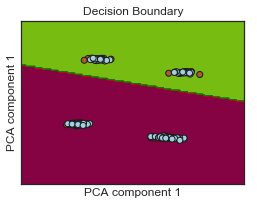

In [30]:
# Plotting the decision boundary for the model using PCA
# option 2

from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

pca = PCA(n_components=2).fit(Xscaled)
pca_2d = pca.transform(Xscaled)

x_min, x_max = pca_2d.min() - .5, pca_2d.max() + .5
y_min, y_max = pca_2d.min() - .5, pca_2d.max() + .5

h = .02  # step size in the mesh

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

logreg = LogisticRegression(solver='liblinear')
logreg.fit(pca_2d, Y)

ypred = logreg.predict(pca_2d)

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.plasma)
plt.contourf(xx, yy, Z, alpha=0.5, cmap = ListedColormap(('red', 'green')))# bounary line
              
# Plot also the training points
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)

plt.xlabel('PCA component 1')
plt.ylabel('PCA component 1')
plt.title('Decision Boundary')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

<div class="alert alert-info">9. Identify which of the following variables are positively associated with the target column. (1 point) </div>

In [27]:
print('Positively associated features : ')
for key, val in coef_dict.items():
    if val > 0:
        print(key)

Positively associated features : 
totlen 
headlen 
skullwid 


<div class="alert alert-info"> 10. Suppose we see a possum that is male, its skull is about 63 mm wide, its head length is 46 cm long, and its total length is 83 cm. What is the computed probability that this possum is from Victoria? How confident are you in the model’s accuracy of this probability calculation? (2 points) </div>

In [29]:
newx = np.array([1, 83.0, 46, 63])
newx = (newx).reshape(1, -1)

print('x = ', newx)
print('y = ', logistic_model.predict(newx))

print("The possum is from "," other area," if logistic_model.predict(newx)==0 else " Victoria." )

#Probability estimates.
# print(logistic_model.predict_proba(newx))

# Predict confidence scores for samples.
print( 'Confidence score = ' , logistic_model.decision_function(newx) )

x =  [[ 1. 83. 46. 63.]]
y =  [1]
The possum is from   Victoria.
Confidence score =  [20.19370942]
